In [1]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt

# 从网站下载数据的途径 

* 使用网站的API来下载数据
* 直接读取网页的html并且从中抽取出有用信息或数据

# Requests

Requests 是 Python HTTP 库，可以对网站进行请求并获得网站返回相应有如下几个功能

* get、post方法来抓取网页和提交网页表单
* 并且可以配置代理
* 使用cookies
* 伪装浏览器


In [2]:
url = 'https://www.liaoxuefeng.com/wiki/1016959663602400/1183249464292448'
html = requests.get(url=url)
html.status_code

503

In [3]:
user_agent = "User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:82.0) Gecko/20100101 Firefox/82.0"
html = requests.get(url=url,headers={'User-Agent': user_agent} )
print(html.status_code)

200


# BeautifulSoup

BeautifulSoup 集成到bs4
可以使用html.parser或lxml parser，lxml速度很快更稳定，不过需要安装

```
pip install bs4
pip install lxml
```
使用BeautifulSoup构造出网页的树状结构，之后通过标签tag，和属性attributes对网页内容进行搜索和遍历


## 熟悉网页的各种标签和属性

可在浏览器打开相应网页，和当前html做对应，理解html

In [6]:
with open('./materials/warandpeace.html', 'r') as f:
    html = f.read()
    
print(html[:1000])



<!-- saved from url=(0052)http://www.pythonscraping.com/pages/warandpeace.html -->
<html><head><meta http-equiv="Content-Type" content="text/html; charset=windows-1252">
<style>
.green{
	color:#55ff55;
}
.red{
	color:#ff5555;
}
#text{
	width:50%;
}
</style>
</head>
<body>
<h1>War and Peace</h1>
<h2>Chapter 1</h2>
<div id="text">
"<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.</span>"
<p>
It was in July, 1805, and the speaker was the well-known <span class="green">Anna
Pavlovna Scherer</span>, maid of honor and favorite of the <span class="green">Empress M

### 不同表达式同一个意思

beautifulsoup中对其函数比较宽容，既可以用aaaBBB（java、C++等语言）的形式，也可以用aaa_bbb（python语言特点）的形式

soup.find_all == soup.findAll

name_list = soup.find_all('span', {'class': 'green'})

similar as 

name_list = soup.find_all('span', class_='green')

In [7]:
soup = BeautifulSoup(html, 'lxml')
print(soup.find_all('p') == soup.findAll('p'))
print(soup.find_all('span', class_='green') == soup.find_all('span', {'class': 'green'}))

True
True


![green](./materials/1.png)
![green1](./materials/1_1.png)

In [28]:
# 可以通过.tag的方法来得到相应的tag块，但只能返回第一个tag，这里是p tag
soup = BeautifulSoup(html, 'lxml')
soup.p.prettify()

'<p>\n 这是一个段落,段落内容是这样的...\n</p>\n'

In [29]:
# find方法与上述.tag方法等价
soup.find('p').prettify()

'<p>\n 这是一个段落,段落内容是这样的...\n</p>\n'

In [30]:
#获得tag里的内容
soup.p.contents

['\n        这是一个段落,段落内容是这样的...\n    ']

In [27]:
# 如果是嵌套元素，则引用第外层tag后获得的元素依然为BeautifulSoup类型
# 因此可以循环使用其相应的方法
with open('./materials/1.html', 'r') as f:
    html = f.read()

soup = BeautifulSoup(html, 'lxml')    
# li 为 ul 的子元素 
soup_list = soup.ul
print(soup_list.li)

<li>技术人员</li>


In [34]:
#寻找文章中的tag为span，颜色属性为绿色的元素
with open('./materials/warandpeace.html', 'r') as f:
    html = f.read()
    
soup = BeautifulSoup(html, 'lxml')      
name_list = soup.find_all('span', class_='green')
for name in name_list[:10]:
    print(name.get_text())

Anna
Pavlovna Scherer
Empress Marya
Fedorovna
Prince Vasili Kuragin
Anna Pavlovna
St. Petersburg
the prince
Anna Pavlovna
Anna Pavlovna
the prince
the prince


In [284]:
#寻找多个tag，这里用来查找各级标题
titles = soup.find_all(['h1', 'h2','h3','h4','h5','h6'])
print([title for title in titles])
print(titles[0].get_text())

[<h1>War and Peace</h1>, <h2>Chapter 1</h2>]
War and Peace


![red_green](./materials/1_3.png)

In [35]:
#寻找多个属性，这里用来查找红色绿色文字

all_text = soup.find_all('span', class_=['green', 'red']) # class style and id atrributes
print([text for text in all_text[:4]])

[<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.</span>, <span class="green">Anna
Pavlovna Scherer</span>, <span class="green">Empress Marya
Fedorovna</span>, <span class="green">Prince Vasili Kuragin</span>]


In [36]:
#寻找text
name_list = soup.find_all(text='the prince')
print(len(name_list))

7


## 了解表格的解析

除了使用标签和属性，也可以用树状结构来进行网页内容的解析


In [37]:
with open('./materials/selling.html', 'r') as f:
    html = f.read()
    
print(html[:1000])


<html><head><meta http-equiv="Content-Type" content="text/html; charset=windows-1252">
<style>
img{
	width:75px;
}
table{
	width:50%;
}
td{
	margin:10px;
	padding:10px;
}
.wrapper{
	width:800px;
}
.excitingNote{
	font-style:italic;
	font-weight:bold;
}
</style>
</head>
<body>
<div id="wrapper">
<img src="./selling_files/logo.jpg" style="float:left;">
<h1>Totally Normal Gifts</h1>
<div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is
hand-curated by well-paid, free-range Tibetan monks.<p>
We haven't figured out how to make online shopping carts yet, but you can send us a check to:<br>
123 Main St.<br>
Abuja, Nigeria
<br>We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</p></div>
<table id="giftList">
<tbody><tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>

<tr id="gift1" class="gift"><td>
Vegetable Basket
</td><td>
Thi

In [38]:
# 构造soup
soup = BeautifulSoup(html, 'lxml')

![table](./materials/3.png)

In [39]:
# 通过引用tag或者find函数获得的元素是同样的
print(soup.find('table', {'id':'giftList'}).tr == soup.find('table', {'id':'giftList'}).find('tr'))

True


In [42]:
# 表格第一行的兄弟单位获取
for sibling in soup.find('table', {'id':'giftList'}).tr.next_siblings:   
    print(sibling) 



<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="./selling_files/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="./selling_files/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="./selling_files/img3.jpg"/>
</td></tr>


<tr class="gift" id="gift4"><td>
Dead Parrot
</td><td>
This is a

![price](./materials/3_1.png)

In [43]:
# 通过属性匹配准确到找到所需要的元素, 在按照树状结构来定位所需元素
# src为该元素的属性
print(soup.find_all('img',src='./selling_files/img1.jpg'))
print(soup.find('img',src='./selling_files/img1.jpg').parent.previous_sibling.get_text())

[<img src="./selling_files/img1.jpg"/>]

$15.00



In [44]:
# find函数可以通过传入lambda函数来寻找特定属性数目的元素

soup.find_all(lambda tag: len(tag.attrs) == 2)

[<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>,
 <img src="./selling_files/logo.jpg" style="float:left;"/>,
 <tr class="gift" id="gift1"><td>
 Vegetable Basket
 </td><td>
 This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
 <span class="excitingNote">Now with super-colorful bell peppers!</span>
 </td><td>
 $15.00
 </td><td>
 <img src="./selling_files/img1.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift2"><td>
 Russian Nesting Dolls
 </td><td>
 Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
 </td><td>
 $10,000.52
 </td><td>
 <img src="./selling_files/img2.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift3"><td>
 Fish Painting
 </td><td>
 If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</sp

# 网页利用BeautifulSoup解析实例-统计大秦赋打分

* 使用request来打开网页，这里需要设置表头，否则会被douban拒绝
* 把打开的html放到BeautifulSoup里，构建查询的树状结构soup, 这里parser可以选择’lxml‘，’html.parser‘等 
* 分析网页组织结构，找出打分的tag和属性，这里是class_='review-list' 和 class_='main-title-rating'
* 统计得分比例

## 豆瓣等门户网站通常有API进行调用来获取数据，通常不允许爬虫去网站下载信息

这里可用requests包中的表头来伪装成真实的浏览器，具体操作间图示


![net](./materials/4.png)
```
```
<font color=orange size=20> 这里使用firefox浏览器做示意分析，如图打开工具-> web开发->网络，重新刷新加载页面 </font>

![net1](./materials/4_1.png)
## 在操作台，左侧网络中随便选中一个网址，在右侧窗口中，点击重发，选择编辑重发，在下面的请求头中即可获取“User-Agent:”

In [49]:
# 伪装成firefox的表头
user_agent = "User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:82.0) Gecko/20100101 Firefox/82.0"

In [50]:
url = 'https://movie.douban.com/subject/26413293/'
html = requests.get(url=url,headers={'User-Agent': user_agent} )
soup = BeautifulSoup(html.content, 'lxml') # lxml parser速度较快，推荐

In [52]:
# 获得reviewer的资料，查看review前的attributes是什么
soup.find_all('div', class_='main review-item')

[<div class="main review-item" id="13045497">
 <header class="main-hd">
 <a class="avator" href="https://www.douban.com/people/162291901/">
 <img height="24" src="https://img2.doubanio.com/icon/u162291901-2.jpg" width="24"/>
 </a>
 <a class="name" href="https://www.douban.com/people/162291901/">苍华</a>
 <span class="allstar10 main-title-rating" title="很差"></span>
 <span class="main-meta" content="2020-12-10">2020-12-10 01:29:29</span>
 </header>
 <div class="main-bd">
 <h2><a href="https://movie.douban.com/review/13045497/">从编剧视角，解析《大秦赋》究竟差在哪里</a></h2>
 <div class="review-short" data-rid="13045497" id="review_13045497_short">
 <div class="short-content">
 
                         可笑的是，这部剧播出之前我还在劝别人：对正剧宽容一点，不要动不动就说不如前作，不要先入为主，不要墨守成规。 结果它就这么打我脸。 看得我如坐针毡，如芒在背，如鲠在喉…… 我冷静许久，确信自己的判断没有错，于是有了这个长评。 接下来，我会从编剧的角度，系统性地分...
 
                          (<a class="unfold" href="javascript:;" id="toggle-13045497-copy" title="展开">展开</a>)
                     </div>
 </div>
 <div class="hidden" id="revi

In [53]:
# 获得用户的名字，以及评分的等级
for i, r in enumerate(soup.find_all('div', class_='main review-item')):
    print(i, r.find('a', class_='name').get_text(), r.find('span', class_='main-title-rating')['title'])
    print(r.find('div', class_='short-content').get_text())

0 苍华 很差


                        可笑的是，这部剧播出之前我还在劝别人：对正剧宽容一点，不要动不动就说不如前作，不要先入为主，不要墨守成规。 结果它就这么打我脸。 看得我如坐针毡，如芒在背，如鲠在喉…… 我冷静许久，确信自己的判断没有错，于是有了这个长评。 接下来，我会从编剧的角度，系统性地分...

                         (展开)
                    
1 李小丢 很差


                        作为《大秦帝国》的收官之作，《大秦帝国之东出》（播出时更名为《大秦赋》）在开拍之前就备受期待，特别是作为原著和电视剧的双厨粉，看到编剧是大秦帝国第二部《大秦帝国之纵横》的编剧李梦，感觉更是稳了。 12.1日晚首播六集之后，豆瓣开分高达8.9分，可见观众对一部好的电...

                         (展开)
                    
2 苍华 很差


                        拖延这么多年，又改了名字，“大秦帝国”改成“大秦赋”，也不知道帝国二字惹着哪位了。 秦始皇那难道不是帝国，还能是民国啊？ 第一，汉赋是西汉随着社会日益富足而兴起的文体，秦这会儿没有严格意义上的赋，改成“大秦赋”就很尴尬，怎么看怎么别扭。 第二，汉赋这种文体，它...

                         (展开)
                    
3 樱花娃娃 很差


                        真的期待这部剧很久很久了，毕竟大秦帝国系列的口碑一直都很不错，而且之前关于祖龙的很多剧都是偶像玛丽苏的存在(赢天下什么的……)想着这回终于能在正剧里看到一个靠谱的秦始皇了。 盼望着盼望着，它，终于开播了！虽然在之前知道是张鲁一来演秦始皇我就有点隐隐的担忧，不是...

                         (展开)
                    
4 乌鸦之歌 很差


                        这条本来应该发在小组供大家讨论的，可惜被脆弱的管理员删帖封号一通操作，只能发剧评了，顺便请路过的好人帮我评评理 这剧的近几集来贯穿始终，雷倒观众无数的楚系宫斗

## 写一个函数可以用来抽取本页面中的所有评分

输入：网页url

输出：得到页面中的评分list

In [54]:
def get_stars(url):
    h = requests.get(url=url,headers={'User-Agent': user_agent} )# 下载网页
    if h.status_code != 200:
        raise EnvironmentError('The web can not be accessed by this program!')
    s = BeautifulSoup(h.content, 'lxml') # 构造soup
    return [k['title'] for k in s.find_all('span', class_='main-title-rating')]

In [55]:
comment_stars = get_stars('https://movie.douban.com/subject/26413293/reviews?start=40')

In [56]:
comment_stars

['还行',
 '还行',
 '还行',
 '很差',
 '很差',
 '很差',
 '很差',
 '很差',
 '很差',
 '较差',
 '很差',
 '很差',
 '很差',
 '较差',
 '还行',
 '很差',
 '很差',
 '很差',
 '很差',
 '很差']

## 写一个函数可以对评分进行barplot绘图

输入：stars list

输出：做出barplot，对应bar的级别分别为力荐（5星），推荐（4星），还行（3星），较差（2星），很差（1星）

课后练习：
修改绘图函数使其与豆瓣的评分图尽量相似

![dou.png](./materials/4_2.png)



In [57]:
def stars_barplot(comment_stars):
    # initial stars字典
    comment2star = {k:v for k,v in zip(['力荐','推荐','还行','较差','很差'], 
                                  ['5 stars', '4 stars', '3 stars', '2 stars', '1 star'])}
    stars2num = {k:0 for k in ['5 stars', '4 stars', '3 stars', '2 stars', '1 star']}
    for c in comment_stars:
        stars2num[comment2star[c]] = stars2num[comment2star[c]] + 1
        
    fig, ax = plt.subplots(1,1,figsize=(6,3))        
    ax.barh(list(stars2num.keys()), list(stars2num.values()), color='C1')
    plt.show()

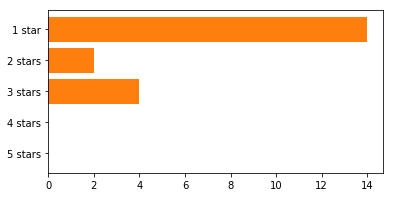

In [58]:
stars_barplot(comment_stars)

## 写一个函数可以把输入网页中不同用户的用户名，评论标题，和打分（如果没有，标识为未知，以及评论时间得到


* 从inspect element中查询出该网页所需元素的tag和属性
* 下载数据的存储形态
* 特殊情况处理，打分等

In [59]:
url = 'https://movie.douban.com/subject/26413293/reviews?start=100'
html = requests.get(url=url,headers={'User-Agent': user_agent} )
soup = BeautifulSoup(html.content, 'lxml') # lxml parser速度较快，推荐

In [60]:
# 由于对应关系，所以需要对每一个评论进行分析和parsing
# print(len(soup.find_all('div', class_='review-item')))
for i, r in enumerate(soup.find_all('div', class_='review-item')):
    # 提取用户情况
    name = r.find('a', class_='name').get_text()
    # 提取打分情况
    comment_stars = r.find_all('span', class_='main-title-rating')
    if comment_stars:
        comment_stars = comment_stars[0]['title']
    else:
        comment_stars = '未知' # 有未打分的用户
    
    # 提取评论情况
    comment = r.find_all('h2')
    if comment:
        comment = r.find_all('h2')[0].get_text()
    else:
        comment = '未知' # 有未评论用户
    
    # 提取评论时间
    comment_date = r.find_all('span', class_='main-meta')
    if comment_date:
        comment_date = r.find_all('span', class_='main-meta')[0]['content']
    else:
        comment_date = '未知' # 有未评论用户
    print(i, name, comment_stars, comment, comment_date)    

0 Bruce 较差 半夜睡不着觉，求问去哪投诉让此剧下架？ 2020-12-13
1 猪已上树 很差 编剧拉胯！！ 2020-12-13
2 了不起的盖尔特 很差 应该叫大情妇 2020-12-12
3 樱木花花 较差 关于宣太后地位的讨论！胡说八道的民科有市场，史学专著没人看？ 2020-12-09
4 Kirk 较差 李斯出场，抱歉我就弃了 2020-12-06
5 温陶 很差 大秦令人惋惜的收官 2020-12-06
6 fzhu 未知 导演难道不知剧中人物的真实年龄吗？ 2020-12-05
7 ktbaobao 很差 大秦系列看来许多遍 这次大秦赋 真的看瞎了眼 2020-12-04
8 唐虚无僧 还行 第一集：“夺嫡”戏份带来的不祥预感 2020-12-03
9 普通的胖子 较差 对现在已经看完的六集一些感想，厚重感不足，剧情不够酣畅 2020-12-02
10 完璧 很差 《大秦赋》从宫斗剧升级为三级色情片，刷新国剧道德底线之新低。 2020-12-21
11 一夕一路 很差 一星都多！ 2020-12-19
12 不羁de汉子 很差 大秦赋观后感 2020-12-19
13 豆友227794541 很差 秦国的兴起与灭亡 2020-12-18
14 飞越杜娟窝 还行 《好想知道导演眼里的秦王朝是咋样的》 2020-12-18
15 易水寒 很差 烂剧毁经典 2020-12-17
16 刘天庆 较差 下降的太慢了 2020-12-17
17 山微漾 还行 这可能是最忠于历史的秦始皇，但却不是一部好看的历史剧 2020-12-16
18 青石 还行 从8.9狂跌到6.9，登上央视的《大秦赋》怎么就“崩”了？ 2020-12-15
19 淡墨痕、 很差 大秦赋客观梳理 2020-12-15


In [61]:
def collect_data(url):
    """
    使用list of list来存储下载信息，其中子list中包含着每一个用户的评论，打分，时间等信息
    外层list中包含所有用户的list信息
    """
    html = requests.get(url=url,headers={'User-Agent': user_agent} )
    soup = BeautifulSoup(html.content, 'lxml') # lxml parser速度较快，推荐
    # 由于对应关系，所以需要对每一个评论进行分析和parsing
    # print(len(soup.find_all('div', class_='review-item')))
    data = []
    for i, r in enumerate(soup.find_all('div', class_='review-item')):
        # 提取用户情况
        name = r.find('a', class_='name').get_text()
        # 提取打分情况
        comment_stars = r.find_all('span', class_='main-title-rating')
        if comment_stars:
            comment_stars = comment_stars[0]['title']
        else:
            comment_stars = '未知' # 有未打分的用户

        # 提取评论情况
        comment = r.find_all('h2')
        if comment:
            comment = r.find_all('h2')[0].get_text()
        else:
            comment = '未知' # 有未评论用户

        # 提取评论时间
        comment_date = r.find_all('span', class_='main-meta')
        if comment_date:
            comment_date = r.find_all('span', class_='main-meta')[0]['content']
        else:
            comment_date = '未知' # 有未评论用户
        
        data.append([i,name, comment_stars, comment, comment_date] )
        
    return data

In [62]:
collect_data(url='https://movie.douban.com/subject/26413293/reviews?start=100')

[[0, 'Bruce', '较差', '半夜睡不着觉，求问去哪投诉让此剧下架？', '2020-12-13'],
 [1, '猪已上树', '很差', '编剧拉胯！！', '2020-12-13'],
 [2, '了不起的盖尔特', '很差', '应该叫大情妇', '2020-12-12'],
 [3, '樱木花花', '较差', '关于宣太后地位的讨论！胡说八道的民科有市场，史学专著没人看？', '2020-12-09'],
 [4, 'Kirk', '较差', '李斯出场，抱歉我就弃了', '2020-12-06'],
 [5, '温陶', '很差', '大秦令人惋惜的收官', '2020-12-06'],
 [6, 'fzhu', '未知', '导演难道不知剧中人物的真实年龄吗？', '2020-12-05'],
 [7, 'ktbaobao', '很差', '大秦系列看来许多遍 这次大秦赋 真的看瞎了眼', '2020-12-04'],
 [8, '唐虚无僧', '还行', '第一集：“夺嫡”戏份带来的不祥预感', '2020-12-03'],
 [9, '普通的胖子', '较差', '对现在已经看完的六集一些感想，厚重感不足，剧情不够酣畅', '2020-12-02'],
 [10, '完璧', '很差', '《大秦赋》从宫斗剧升级为三级色情片，刷新国剧道德底线之新低。', '2020-12-21'],
 [11, '一夕一路', '很差', '一星都多！', '2020-12-19'],
 [12, '不羁de汉子', '很差', '大秦赋观后感', '2020-12-19'],
 [13, '豆友227794541', '很差', '秦国的兴起与灭亡', '2020-12-18'],
 [14, '飞越杜娟窝', '还行', '《好想知道导演眼里的秦王朝是咋样的》', '2020-12-18'],
 [15, '易水寒', '很差', '烂剧毁经典', '2020-12-17'],
 [16, '刘天庆', '较差', '下降的太慢了', '2020-12-17'],
 [17, '山微漾', '还行', '这可能是最忠于历史的秦始皇，但却不是一部好看的历史剧', '2020-12-16'],
 [18, '青石', '还行', '从8.9狂跌到6.

# 网址获取与管理器

* 爬虫要进行下去，需要不断获得新的链接
* 判断网页是否被爬过，被爬过则不再存储此链接
* 爬虫终止条件：没有待爬链接，或者达到爬虫网页上限（防止被封）

这是爬虫的名字的来源，不断的在不同web上穿梭爬取所需数据

## 寻找所需数据的网址特点

很容易观察，所需网页的网址为下面有页码的链接

In [64]:
# 所有连接均为相对连接，变化量为?start=20,40,60, 最简单的方式
page_links = [f'https://movie.douban.com/subject/26413293/reviews?start={i}' for i in range(0,1500,20)]
print(page_links)

['https://movie.douban.com/subject/26413293/reviews?start=0', 'https://movie.douban.com/subject/26413293/reviews?start=20', 'https://movie.douban.com/subject/26413293/reviews?start=40', 'https://movie.douban.com/subject/26413293/reviews?start=60', 'https://movie.douban.com/subject/26413293/reviews?start=80', 'https://movie.douban.com/subject/26413293/reviews?start=100', 'https://movie.douban.com/subject/26413293/reviews?start=120', 'https://movie.douban.com/subject/26413293/reviews?start=140', 'https://movie.douban.com/subject/26413293/reviews?start=160', 'https://movie.douban.com/subject/26413293/reviews?start=180', 'https://movie.douban.com/subject/26413293/reviews?start=200', 'https://movie.douban.com/subject/26413293/reviews?start=220', 'https://movie.douban.com/subject/26413293/reviews?start=240', 'https://movie.douban.com/subject/26413293/reviews?start=260', 'https://movie.douban.com/subject/26413293/reviews?start=280', 'https://movie.douban.com/subject/26413293/reviews?start=300

In [ ]:
## 写一个爬虫网址获取与管理器

输入：初始网页
输出：浏览网页，以及未浏览网页

功能：
* 获得所需要的新网页url
* 去新网页中继续获得url
* 标注访问过的网页
* 去除重复网页
* 具有终止条件

先写一个获取链接的函数get_links, 从当前网页中获得所需links

In [66]:
# 假如规律不清楚，通过爬虫不断爬取网页来获取新链接
initial_url = 'https://movie.douban.com/subject/26413293/reviews?start=100'
html = requests.get(url=initial_url,headers={'User-Agent': user_agent} )
soup = BeautifulSoup(html.content, 'lxml') # lxml parser速度较快，推荐

In [67]:
pg = soup.find('div', class_='paginator')
for l in pg.find_all('a'):
    link = f'https://movie.douban.com/subject/26413293/reviews?{l["href"]}'
    print(link)


https://movie.douban.com/subject/26413293/reviews??start=80
https://movie.douban.com/subject/26413293/reviews??start=0
https://movie.douban.com/subject/26413293/reviews??start=20
https://movie.douban.com/subject/26413293/reviews??start=40
https://movie.douban.com/subject/26413293/reviews??start=60
https://movie.douban.com/subject/26413293/reviews??start=80
https://movie.douban.com/subject/26413293/reviews??start=120
https://movie.douban.com/subject/26413293/reviews??start=140
https://movie.douban.com/subject/26413293/reviews??start=160
https://movie.douban.com/subject/26413293/reviews??start=180
https://movie.douban.com/subject/26413293/reviews??start=1500
https://movie.douban.com/subject/26413293/reviews??start=1520
https://movie.douban.com/subject/26413293/reviews??start=120


In [68]:
def get_links(url):
    html = requests.get(url=url,headers={'User-Agent': user_agent} )
    soup = BeautifulSoup(html.content, 'lxml') # lxml parser速度较快，推荐
    pg = soup.find('div', class_='paginator')
    links = []
    for l in pg.find_all('a'):
        link = f'https://movie.douban.com/subject/26413293/reviews{l["href"]}'
        links.append(link)
    
    return links

In [248]:
def parsing_links(initial_url, end_num_urls=10):
    """
    end_num_urls: total number of webs to visit 终止条件1
    """
    visited_links = [] # 访问过的网址
    not_visited_links = [] # 未访问网址
    not_visited_links.append(initial_url)
    html = requests.get(url=initial_url,headers={'User-Agent': user_agent} )
    soup = BeautifulSoup(html.content, 'lxml') # lxml parser速度较快，推荐 
    
    # 对未访问链接迭代，直到结束
    for i, link in enumerate(not_visited_links):
        print(i, not_visited_links)
#         print(link)
        ls = list(set(get_links(link))) # remove the duplicate links
        if ls:
            not_visited_links += [l for l in ls if (l not in not_visited_links) and (l not in visited_links)]
#             new_links =  [l for l in ls if l not in visited_links]
#             print(new_links)
#             not_visited_links += new_links
            not_visited_links = list(set(not_visited_links))
            visited_links.append(link)
            
        not_visited_links.remove(link)
        
        if len(visited_links) >= end_num_urls:
            break
            
    return not_visited_links, visited_links
        
        
        

In [ ]:
not_visited_links, visited_links = parsing_links(initial_url, end_num_urls=100)

In [ ]:
print(not_visited_links,visited_links)

## 请问以上程序有何错误？

为什么在visited_links时无法爬取所有网页

如何改进？

In [69]:
def parsing_links(initial_url, end_num_urls=100):
    """
    end_num_urls: total number of webs to visit 终止条件1
    """
    # 用作爬虫网页链接管理
    visited_links = [] # 访问过的网址
    not_visited_links = [] # 未访问网址
    
    not_visited_links.append(initial_url)
    html = requests.get(url=initial_url,headers={'User-Agent': user_agent} )
    soup = BeautifulSoup(html.content, 'lxml') # lxml parser速度较快，推荐 
    
    while len(not_visited_links) > 0: #当not_visited_links 为空时，爬虫自然结束
        link = not_visited_links[0]
        print(link)
        ls = list(set(get_links(link))) # remove the duplicate links
        if ls:
            not_visited_links += [l for l in ls if (l not in not_visited_links) and (l not in visited_links)]
            not_visited_links = list(set(not_visited_links))
            visited_links.append(link)
            
        not_visited_links.remove(link)
        
        if len(visited_links) >= end_num_urls: # 当爬过一定数目网页时，让爬虫停止
            break
            
    return not_visited_links, visited_links
        

In [70]:
parsing_links(initial_url)

https://movie.douban.com/subject/26413293/reviews?start=100
https://movie.douban.com/subject/26413293/reviews?start=120
https://movie.douban.com/subject/26413293/reviews?start=140
https://movie.douban.com/subject/26413293/reviews?start=1500
https://movie.douban.com/subject/26413293/reviews?start=1380
https://movie.douban.com/subject/26413293/reviews?start=1320
https://movie.douban.com/subject/26413293/reviews?start=1240
https://movie.douban.com/subject/26413293/reviews?start=1260
https://movie.douban.com/subject/26413293/reviews?start=1520
https://movie.douban.com/subject/26413293/reviews?start=1180
https://movie.douban.com/subject/26413293/reviews?start=1460
https://movie.douban.com/subject/26413293/reviews?start=1360
https://movie.douban.com/subject/26413293/reviews?start=1300
https://movie.douban.com/subject/26413293/reviews?start=1400
https://movie.douban.com/subject/26413293/reviews?start=1160
https://movie.douban.com/subject/26413293/reviews?start=1100
https://movie.douban.com/su

(['https://movie.douban.com/subject/26413293/reviews?start=360',
  'https://movie.douban.com/subject/26413293/reviews?start=380',
  'https://movie.douban.com/subject/26413293/reviews?start=0',
  'https://movie.douban.com/subject/26413293/reviews?start=60',
  'https://movie.douban.com/subject/26413293/reviews?start=1220',
  'https://movie.douban.com/subject/26413293/reviews?start=1340',
  'https://movie.douban.com/subject/26413293/reviews?start=1040',
  'https://movie.douban.com/subject/26413293/reviews?start=340',
  'https://movie.douban.com/subject/26413293/reviews?start=1120',
  'https://movie.douban.com/subject/26413293/reviews?start=300',
  'https://movie.douban.com/subject/26413293/reviews?start=400',
  'https://movie.douban.com/subject/26413293/reviews?start=200',
  'https://movie.douban.com/subject/26413293/reviews?start=1280',
  'https://movie.douban.com/subject/26413293/reviews?start=1080',
  'https://movie.douban.com/subject/26413293/reviews?start=160',
  'https://movie.douba

# 网页解析与网址管理结合实践-爬取大秦赋所有评论，请说明大秦赋是否口碑随时间下滑？

* 改写get_links函数
* 结合collect_data函数
* 爬取所有大秦赋网页，并获取数据
* 做出时间与评分的关系图

In [12]:
def collect_data_url(url):
    """
    使用list of list来存储下载信息，其中子list中包含着每一个用户的评论，打分，时间等信息
    外层list中包含所有用户的list信息
    """
    html = requests.get(url=url,headers={'User-Agent': user_agent} )
    soup = BeautifulSoup(html.content, 'lxml') # lxml parser速度较快，推荐
    # 由于对应关系，所以需要对每一个评论进行分析和parsing
    # print(len(soup.find_all('div', class_='review-item')))
    data = []
    for i, r in enumerate(soup.find_all('div', class_='review-item')):
        # 提取用户情况
        name = r.find('a', class_='name').get_text()
        # 提取打分情况
        comment_stars = r.find_all('span', class_='main-title-rating')
        if comment_stars:
            comment_stars = comment_stars[0]['title']
        else:
            comment_stars = '未知' # 有未打分的用户

        # 提取评论情况
        comment = r.find_all('h2')
        if comment:
            comment = r.find_all('h2')[0].get_text()
        else:
            comment = '未知' # 有未评论用户

        # 提取评论时间
        comment_date = r.find_all('span', class_='main-meta')
        if comment_date:
            comment_date = r.find_all('span', class_='main-meta')[0]['content']
        else:
            comment_date = '未知' # 有未评论用户
        
        data.append([i,name, comment_stars, comment, comment_date] )
        
    # get links
#     pg = soup.find('div', class_='paginator')
    urls = []
#     for l in pg.find_all('a'):
#         u = f'https://movie.douban.com/subject/26413293/reviews{l["href"]}'
#         urls.append(u)
        
    return data,urls

In [13]:
collect_data_url(url='https://movie.douban.com/subject/26413293/reviews?start=100')

([], [])

In [14]:
url='https://movie.douban.com/subject/26413293/reviews?start=100'
html = requests.get(url=url,headers={'User-Agent': user_agent} )
soup = BeautifulSoup(html.content, 'lxml') # lxml parser速度较快，推荐

In [15]:
soup

<html><body><p>检测到有异常请求从你的 IP 发出，请 <a href="https://accounts.douban.com/passport/login?redir=https%3A%2F%2Fmovie.douban.com%2Fsubject%2F26413293%2Freviews%3Fstart%3D100">登录</a> 使用豆瓣。
</p></body></html>

# 动态网页抓取

使用selenium包，如真的浏览器一样

### selenium 安装
```
pip install selenium
```

### Firefox安装

### driver安装

Firefox浏览器需安装geckdriver，下载地址：https://github.com/mozilla/geckodriver/releases；

相应的，Chrome浏览器需要安装chromedriver


## BeautifulSoup 在动态网页中无法使用

![s](./materials/6.png)
有时我们可能会遇到这种情况，前端页面展示出来的东西，并不在后端源代码中，自然无法通过使用requests请求获得源码进行爬取。
### 如上图网页的链接为javascript指向，静态解析无法得到真正的链接，必须要去点选，这时候就需要动态网页解析。


In [71]:
from selenium import webdriver
import time
from pandas.io.html import read_html

## selenium 基本使用

* 元素选取
* 元素操作
* 页面操作


### 元素选取

查找第一个
```
find_element_by_id		# 通过元素id
find_element_by_name	# 通过name属性
find_element_by_xpath	# 通过xpath
find_element_by_link_text	# 通过链接文本
find_element_by_partial_link_text
find_element_by_tag_name	# 通过标签名
find_element_by_class_name		# 通过class名称定位
find_element_by_css_selector	# 通过css选择器定位
```
查找多个时

```
find_elements_by_id		# 通过元素id
find_elements_by_name	# 通过name属性
find_elements_by_xpath	# 通过xpath
find_elements_by_link_text	# 通过链接文本
find_elements_by_partial_link_text
find_elements_by_tag_name	# 通过标签名
find_elements_by_class_name		# 通过class名称定位
find_elements_by_css_selector	# 通过css选择器定位
```

In [72]:
driver = webdriver.Firefox(executable_path="./geckodriver") # 打开firefox登陆网址
url = "http://data.eastmoney.com/report/ylyc.html"
# open the home page
driver.get(url)

![62](./materials/6_2.png)

### 通过id来寻找元素

In [82]:
# 通过元素id选取
b = BeautifulSoup(driver.find_element_by_id('title-wrap').get_attribute('innerHTML').strip(),'lxml')
b.find_all('li')
# 可以结合beautifulsoup对其内容做分析

[<li class="active" data-type="hy">行业板块</li>,
 <li data-type="gn">概念板块</li>,
 <li data-type="dy">地域板块</li>,
 <li data-type="market">市场品种</li>]

![63](./materials/63.png)

### 可以通过在浏览器里安装xpath插件来寻找元素位置

In [73]:
# 通过xpath 
driver.find_element_by_xpath('//*[@id="bk-content"]').text#get_attribute('innerHTML')

'全部股票\nA安防设备\nB玻璃陶瓷\n保险\n包装材料\nC材料行业\n船舶制造\nD电子元件\n电子信息\n电力行业\n多元金融\n电信运营\nF房地产\n纺织服装\nG国际贸易\n钢铁行业\n港口水运\n工艺商品\n公用事业\n工程建设\n高速公路\n贵金属\nH化工行业\n航天航空\n化纤行业\n化肥行业\n环保工程\nJ机械行业\n家电行业\n交运设备\n交运物流\n金属制品\nL旅游酒店\nM木业家具\n煤炭采选\n民航机场\nN酿酒行业\n农牧饲渔\n农药兽药\nQ汽车行业\n券商信托\nR软件服务\nS商业百货\n石油行业\n输配电气\n塑胶制品\n食品饮料\n水泥建材\nT通讯行业\nW文化传媒\n文教休闲\nY有色金属\n银行\n医药制造\n仪器仪表\n医疗行业\n园林工程\nZ综合行业\n造纸印刷\n专用设备\n珠宝首饰\n装修装饰'

In [75]:
# 通过链接文本选取
driver.find_element_by_link_text('下一页').click()

## 输入与提交

找到输入窗口后，可以在其内输入值，再提交

![64](./materials/64.png)
### 这里使用xpath的方法来找输入框


In [77]:
driver.find_element_by_xpath('//*[@id="gotopageindex"]').send_keys('21')

![65](./materials/65.png)
### 这里使用class_name的方法来提交

In [78]:
driver.find_element_by_class_name('btn').click()
# driver.find_element_by_xpath('/html/body/div[1]/div[8]/div[2]/div[6]/div[2]/form/input[2]').click()

ElementNotInteractableException: Message: Element <input class="btn" type="submit"> could not be scrolled into view


## selenium 操作元素方法

* clear 清除元素的内容：clear(self)
* send_keys 模拟按键输入：send_keys(self, *value)
* click 点击元素：click(self)
* submit 提交表单：submit(self)
* 获取元素属性：get_attribute(self, name)
* 获取元素文本：text

### 这里面常用功能以上均有举例涉及，此处就不详细讲了

## 动态页面抓取-以东财网站研报与盈利预期

In [79]:
# 需要一个sleep函数，模拟浏览器等待
def sleep(time_len=60):
    now=time.time()
    timer = 0
    while timer != round(time_len):
        end = time.time()
        timer = round(end-now)
    print('Hibernate for {} seconds'.format(time_len))

In [80]:
driver = webdriver.Firefox(executable_path="./geckodriver") # 打开firefox登陆网址
url = "http://data.eastmoney.com/report/ylyc.html"
# open the home page
driver.get(url)
# choose the concept and click
concept='电子元件'
if concept:
    driver.find_element_by_link_text(f"{concept}").click()
    
pages = 5
dfs = []
for page in range(1, pages+1):
    print(f'parsing page {page}')
    # the first page should be preporcessed separately
    if page == 1:
        # some concept does not have page 1
        try:
            next_page = driver.find_element_by_link_text(f"{page}")
            table = driver.find_element_by_id('profitforecast_table')
        except:
            table = driver.find_element_by_id('profitforecast_table')

        sleep(5)
    else:
        # the second to last pages
        try:
            driver.find_element_by_link_text(f"下一页").click()
            sleep(5) # to avoid detected by the server
            table = driver.find_element_by_id('profitforecast_table')
        except:
            print(f'{page} not found within {concept}')
            continue 
    
    # 把html转为dataframe存起来
    table_html = table.get_attribute('innerHTML')
    if not table_html.startswith('<table>'):
        table_html = '<table>' + table_html
    if not table_html.endswith('</table>'):
        table_html = table_html + '</table>'
    df = read_html(table_html)[0]
    dfs.append(df)

parsing page 1
Hibernate for 5 seconds
parsing page 2
Hibernate for 5 seconds
parsing page 3
Hibernate for 5 seconds
parsing page 4
4 not found within 电子元件
parsing page 5
5 not found within 电子元件


## 数据合并清洗

In [81]:
if len(dfs) > 1:
    df_all = dfs[0].append(dfs[1:])
else:
    df_all = dfs[0]
    
cols = ['序号','代码','名称','相关', '研报数','买入','增持','中性','减持','卖出','2019每股收益','2020预测每股收益','2021预测每股收益','2022预测每股收益']
df_all.columns = cols


In [50]:
df_all

,序号,代码,名称,相关,研报数,买入,增持,中性,减持,卖出,2019每股收益,2020预测每股收益,2021预测每股收益,2022预测每股收益
0,1,2241,歌尔股份,详细 股吧,47,41,6,0,0,0,0.395,0.579,0.749,NaN
1,2,2475,立讯精密,详细 股吧,36,29,7,0,0,0,0.673,1.028,1.309,NaN
2,3,2371,北方华创,详细 股吧,36,14,22,0,0,0,0.623,1.082,1.530,NaN
3,4,688981,中芯国际,详细 股吧,34,18,16,0,0,0,0.233,NaN,NaN,NaN
4,5,300014,亿纬锂能,详细 股吧,33,27,6,0,0,0,0.806,1.853,2.342,NaN
5,6,603236,移远通信,详细 股吧,32,14,18,0,0,0,1.383,4.024,5.856,NaN
6,7,603501,韦尔股份,详细 股吧,31,24,7,0,0,0,0.537,1.889,2.533,NaN
7,8,300782,卓胜微,详细 股吧,30,24,6,0,0,0,2.762,6.359,8.580,NaN
8,9,725,京东方A,详细 股吧,30,26,4,0,0,0,0.055,0.147,0.226,NaN
9,10,688396,华润微,详细 股吧,28,21,7,0,0,0,0.330,NaN,NaN,NaN
